In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
###os.environ["DML_VISIBLE_DEVICES"] = "0" 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import cv2
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.applications.vgg16 import VGG16
from keras import layers

# Load the file from the dataset

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'archive/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'archive/test',
        target_size=(64,64),
        batch_size=64,
        class_mode='categorical')

Found 2352 images belonging to 7 classes.
Found 586 images belonging to 7 classes.


In [3]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Split the dataset into test , train

# CNN Model to predict the Mood 

In [4]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

base_model = VGG16(input_shape = (64,64, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False


# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(7, activation='softmax')(x)

model1 = tf.keras.models.Model(base_model.input, x)

model1.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [5]:
history=model1.fit(train_generator,epochs=25,validation_data=validation_generator)


Epoch 1/25
37/37 [==============================] - 134s 3s/step - loss: 2.1074 - accuracy: 0.1905 - val_loss: 1.8316 - val_accuracy: 0.2543
Epoch 2/25
37/37 [==============================] - 60s 2s/step - loss: 1.8208 - accuracy: 0.2543 - val_loss: 1.7447 - val_accuracy: 0.3311
Epoch 3/25
37/37 [==============================] - 60s 2s/step - loss: 1.7560 - accuracy: 0.2989 - val_loss: 1.6719 - val_accuracy: 0.3993
Epoch 4/25
37/37 [==============================] - 60s 2s/step - loss: 1.6817 - accuracy: 0.3312 - val_loss: 1.6671 - val_accuracy: 0.3464
Epoch 5/25
37/37 [==============================] - 59s 2s/step - loss: 1.6201 - accuracy: 0.3580 - val_loss: 1.5747 - val_accuracy: 0.4147
Epoch 6/25
37/37 [==============================] - 60s 2s/step - loss: 1.5691 - accuracy: 0.4014 - val_loss: 1.5352 - val_accuracy: 0.4556
Epoch 7/25
37/37 [==============================] - 59s 2s/step - loss: 1.5401 - accuracy: 0.4026 - val_loss: 1.5120 - val_accuracy: 0.4454
Epoch 8/25
37/37 [=

In [6]:
model1.save('project_kdef_vgg')

INFO:tensorflow:Assets written to: project_kdef_vgg\assets


INFO:tensorflow:Assets written to: project_kdef_vgg\assets


# Plot the Graph to check the how good the model is working

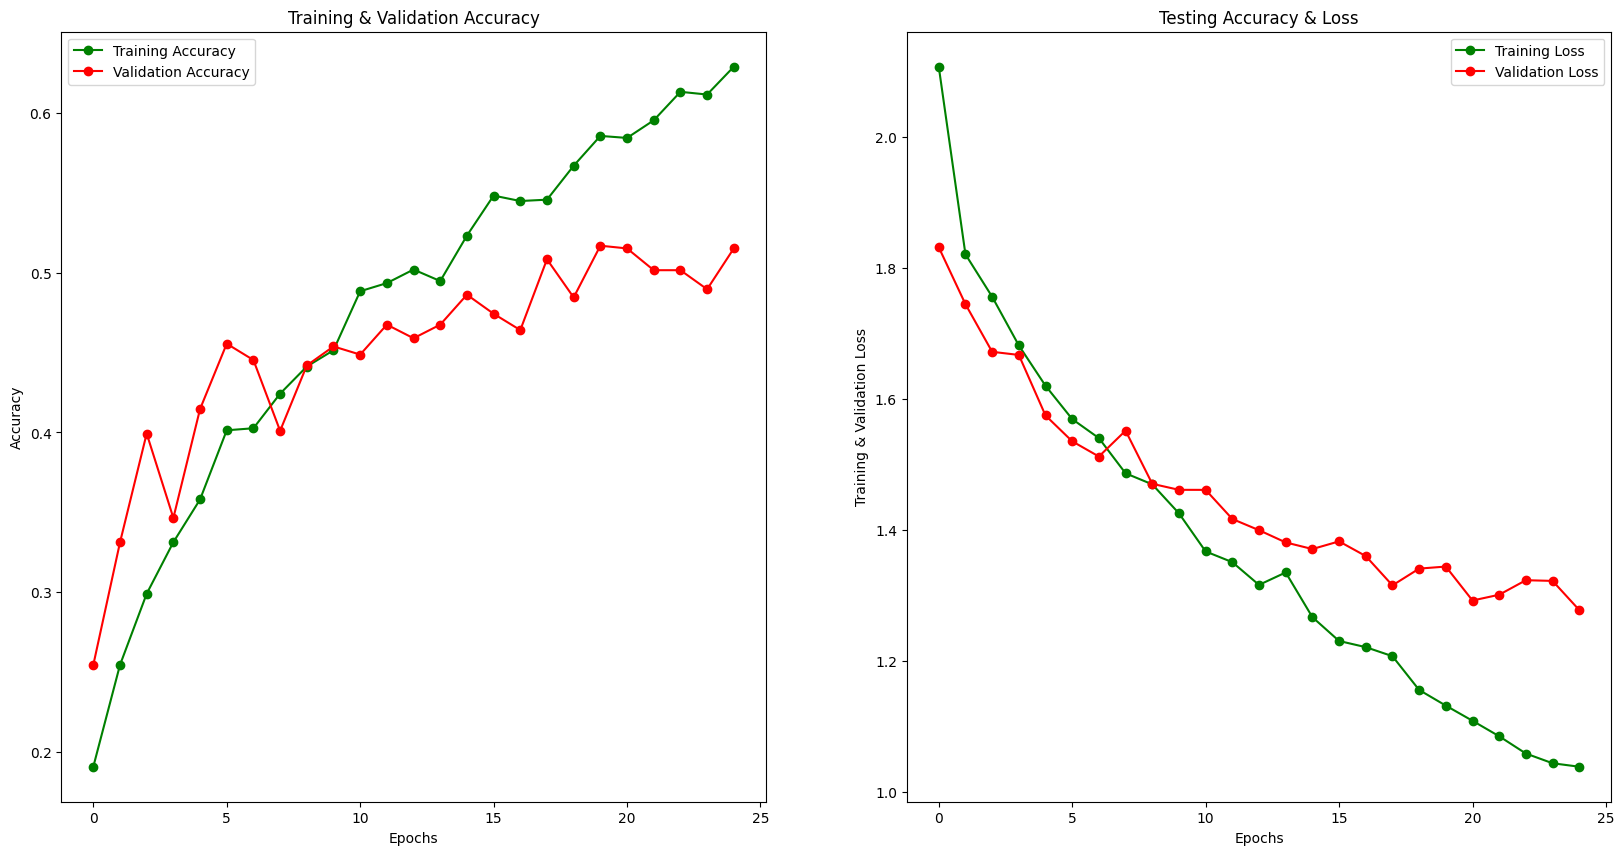

In [7]:
import matplotlib.pyplot as plt
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Creating Confusion Matrix to know the performance of Model

37/37 [==============================] - 48s 1s/step
-----------------------------------------------------------------
[[56 64 41 50 45 25 55]
 [50 54 57 50 40 30 55]
 [54 54 42 56 45 39 46]
 [53 65 39 59 46 26 48]
 [42 66 46 59 52 21 50]
 [55 55 48 59 32 26 61]
 [67 54 46 62 41 31 35]]


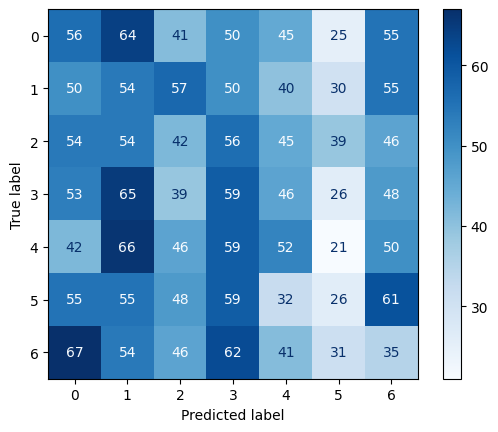

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.17      0.16       336
           1       0.13      0.16      0.14       336
           2       0.13      0.12      0.13       336
           3       0.15      0.18      0.16       336
           4       0.17      0.15      0.16       336
           5       0.13      0.08      0.10       336
           6       0.10      0.10      0.10       336

    accuracy                           0.14      2352
   macro avg       0.14      0.14      0.14      2352
weighted avg       0.14      0.14      0.14      2352



In [8]:
tr_predictions = model1.predict(train_generator)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(train_generator.classes, tr_predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(train_generator.classes, tr_predictions.argmax(axis=1)))
clf_report = classification_report(train_generator.classes, tr_predictions.argmax(axis=1),output_dict=True)

<AxesSubplot: >

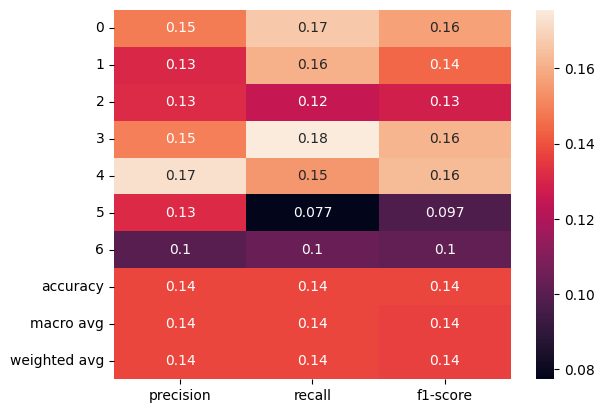

In [9]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

10/10 [==============================] - 13s 1s/step
-----------------------------------------------------------------
[[17  8 13 16 10  3 17]
 [13 13 12 18 10  6 12]
 [11 13 18 15 12  4 11]
 [14 12 11 13  9  6 19]
 [17 11 15 10  9  4 18]
 [18 11 16 13 11  6  8]
 [20 14 13 11 12  6  7]]


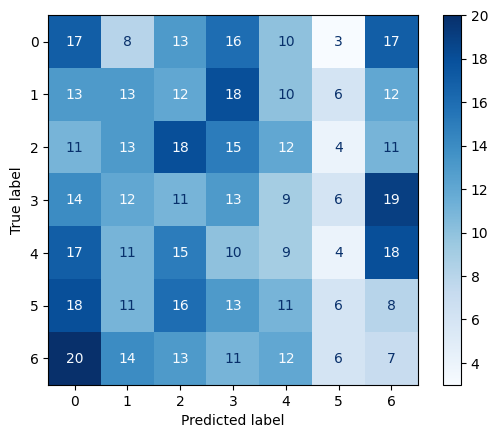

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.20      0.18        84
           1       0.16      0.15      0.16        84
           2       0.18      0.21      0.20        84
           3       0.14      0.15      0.14        84
           4       0.12      0.11      0.11        84
           5       0.17      0.07      0.10        83
           6       0.08      0.08      0.08        83

    accuracy                           0.14       586
   macro avg       0.14      0.14      0.14       586
weighted avg       0.14      0.14      0.14       586



In [10]:
# do prediction on test data
predictions = model1.predict(validation_generator)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(validation_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(validation_generator.classes, predictions.argmax(axis=1)))
clf_report1 = classification_report(validation_generator.classes, predictions.argmax(axis=1),output_dict=True)

<AxesSubplot: >

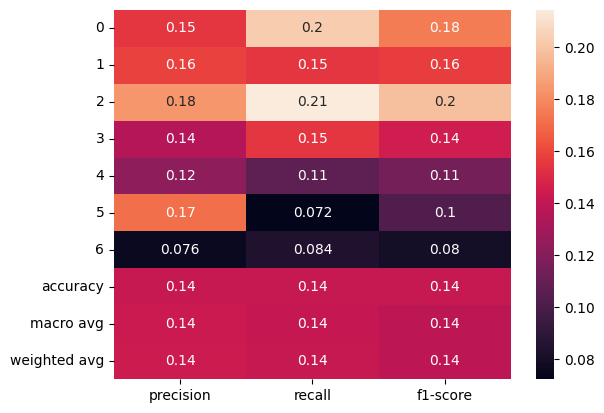

In [11]:
sns.heatmap(pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True)

In [ ]:
img = load_img("/content/data/test/happy/PrivateTest_10077120.jpg",target_size = (48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(emotion_dict[img_index])

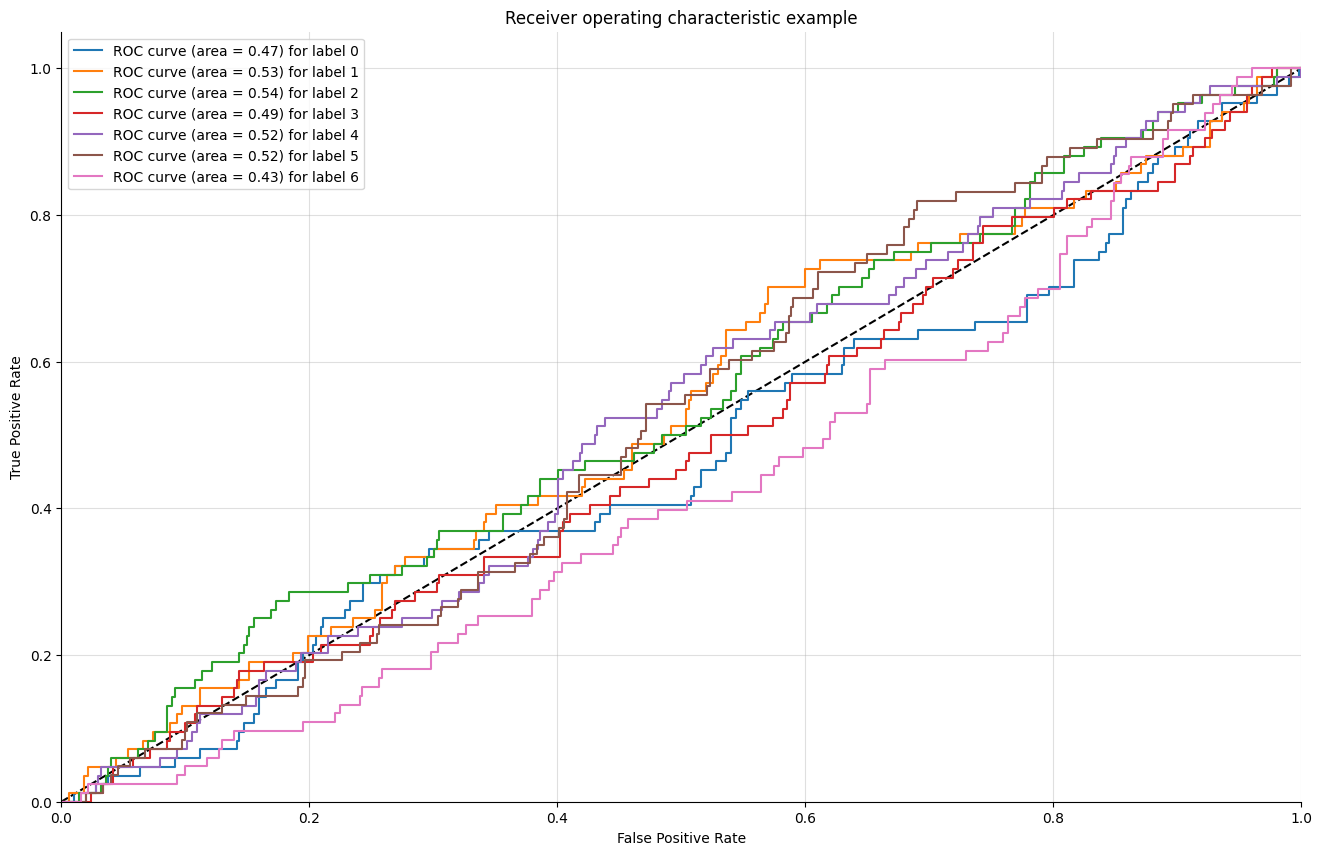

In [12]:
def plot_multiclass_roc( prediction, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(predictions, validation_generator.classes, n_classes=7, figsize=(16, 10))